In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("../Data/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7707,7708,15655859,Munro,848,Spain,Male,35,5,120046.74,2,1,0,84710.65,0
7673,7674,15788634,Romani,750,Spain,Female,37,2,113817.06,1,0,0,88333.74,0
5333,5334,15784445,Huang,717,Spain,Male,33,1,99106.73,1,0,0,194467.23,0
6385,6386,15706810,Zuyeva,606,Germany,Female,32,1,106301.85,2,0,1,59061.25,0
6910,6911,15709199,Burson,511,Spain,Female,40,1,0.00,1,1,1,184118.73,0


In [6]:
df.shape

(10000, 14)

# <span style='color:red'>Data Cleaning</span>

### *First, let's check the N/A values*

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### *There is no NA value in the dataset*
### *Now, let's drop the irrelevant columns*

In [12]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1706,719,Spain,Male,38,0,0.00,1,1,0,126876.47,0
848,611,Spain,Male,51,1,122874.74,1,1,1,149648.45,0
6758,693,Spain,Male,28,1,145118.83,1,0,1,77742.38,0
4654,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1
1725,631,Germany,Female,37,2,121801.72,2,0,1,23146.62,0


### *Data Visualization*

In [23]:
df.groupby('Exited').mean(numeric_only=True)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,
0,651.853196,0.572523,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,0.440844,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


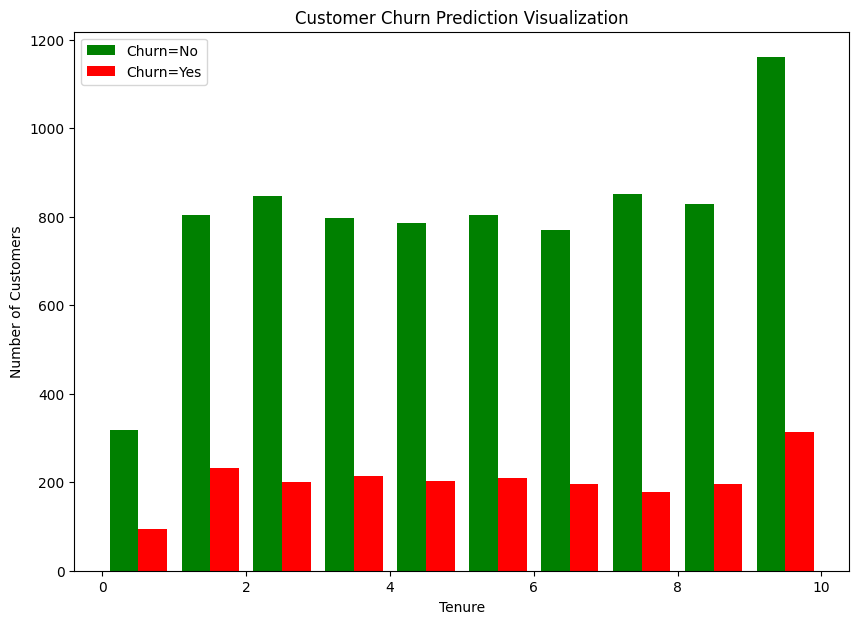

In [41]:
tenure_exited_no = df[df['Exited']==0].Tenure
tenure_exited_yes = df[df['Exited']==1].Tenure
plt.figure(figsize=(10,7))
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_exited_no, tenure_exited_yes], color=['green', 'red'], label=['Churn=No', 'Churn=Yes'])
plt.legend()
plt.show()

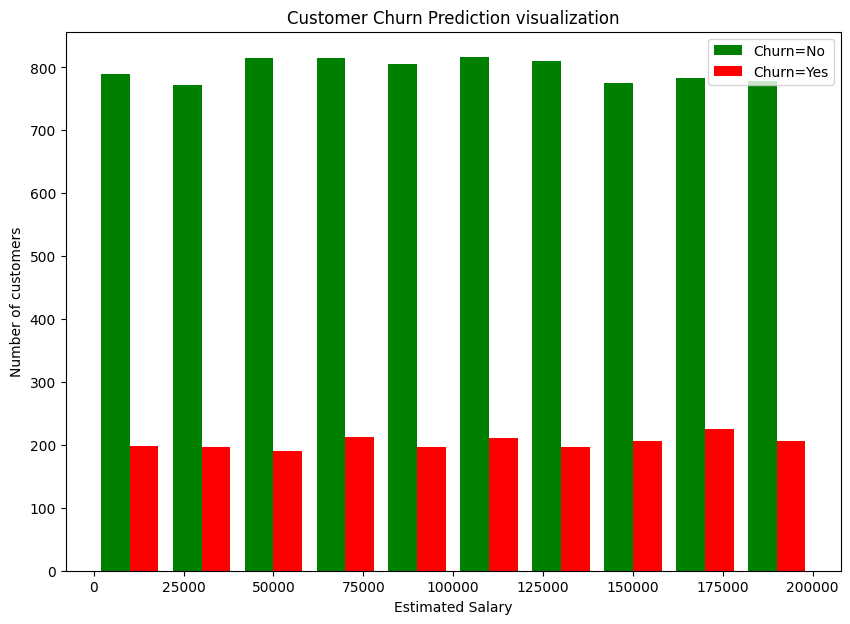

In [38]:
salary_exited_no = df[df['Exited']==0].EstimatedSalary
salary_exited_yes = df[df['Exited']==1].EstimatedSalary
plt.figure(figsize=(10,7))
plt.hist([salary_exited_no, salary_exited_yes], color=['green', 'red'], label=['Churn=No', 'Churn=Yes'])
plt.title('Customer Churn Prediction visualization')
plt.xlabel('Estimated Salary')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

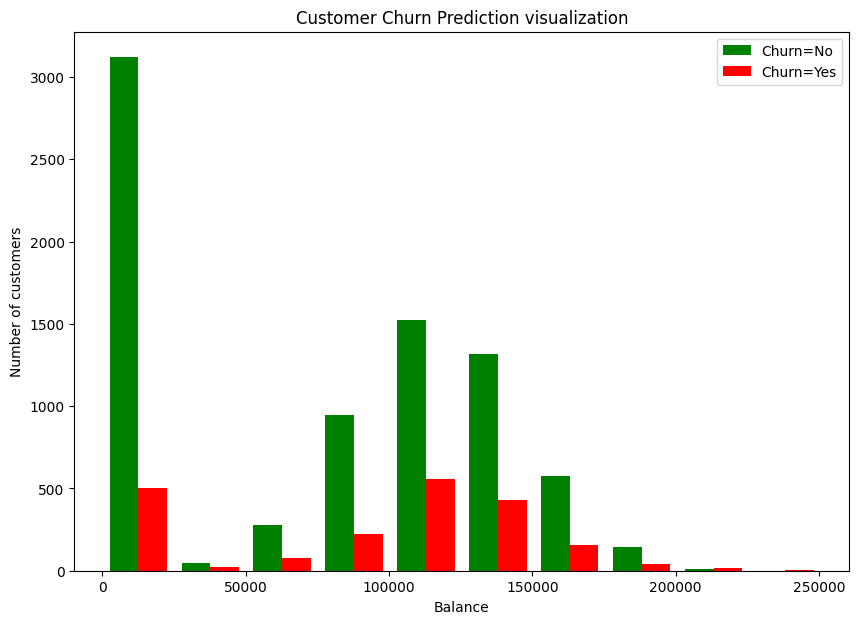

In [37]:
balance_exited_no = df[df['Exited']==0].Balance
balance_exited_yes = df[df['Exited']==1].Balance
plt.figure(figsize=(10,7))
plt.hist([balance_exited_no, balance_exited_yes], color=['green', 'red'], label=['Churn=No', 'Churn=Yes'])
plt.title('Customer Churn Prediction visualization')
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.legend()
plt.show()

### *Let's handle the categorical data columns*

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f"{column}  :  {df[column].unique()}")

In [16]:
print_unique_col_values(df)

Geography  :  ['France' 'Spain' 'Germany']
Gender  :  ['Female' 'Male']


In [17]:
categorical_columns = ['Geography','Gender']

In [18]:
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

In [19]:
print_unique_col_values(df)

Geography  :  ['France' 'Spain' 'Germany']


# *One Hot Encoding*

In [43]:
df2 = pd.get_dummies(df, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [44]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1600,517,1,28,2,115062.61,1,1,0,179056.23,0,True,False,False
4544,673,1,39,8,138160.00,1,1,1,110468.51,0,False,False,True
5397,723,0,40,7,142856.95,2,0,0,38019.74,0,True,False,False
6432,615,0,33,3,137657.25,2,1,1,171657.57,0,False,True,False
6994,557,0,24,4,0.00,1,0,0,20515.72,0,True,False,False


In [45]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

# *Scalling*

In [46]:
columns_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7456,0.880,1,0.027027,0.8,0.000000,2,1,0,0.840786,0,False,False,True
9104,0.612,0,0.216216,0.6,0.238652,1,1,0,0.070112,1,False,False,True
1732,0.770,1,0.418919,0.5,0.486147,1,1,0,0.744035,0,True,False,False
6195,0.328,0,0.310811,0.7,0.000000,2,1,1,0.018727,0,True,False,False
4839,0.362,0,0.472973,0.5,0.508742,1,1,0,0.707517,1,True,False,False


# *Model Training*

In [49]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [51]:
X.shape

(10000, 12)

In [54]:
y.shape

(10000,)

In [55]:
df2.shape

(10000, 13)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69) 

In [58]:
X_train.shape

(8000, 12)

In [59]:
X_test.shape

(2000, 12)

In [92]:
model = keras.Sequential([
    keras.Input(shape=(12,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.7735 - loss: 0.5271
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8082 - loss: 0.4585
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8083 - loss: 0.4503
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8074 - loss: 0.4477
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8107 - loss: 0.4347
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.8331 - loss: 0.3967
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8308 - loss: 0.4066
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8449 - loss: 0.3836
Epoch 9/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8449 - loss: 0.3832
Epoch 10/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8515 - loss: 0.3822
Epoch 11/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8455 - loss: 0.3647
Epoch 12/250
250/250 

In [94]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8608 - loss: 0.3340


[0.3412136137485504, 0.8579999804496765]

In [97]:
yp = model.predict(X_test)
yp[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step


array([[0.21817464],
       [0.03742921],
       [0.58709157],
       [0.11477282],
       [0.07660881],
       [0.16869237],
       [0.09195781],
       [0.4991958 ],
       [0.5829475 ],
       [0.01516598]], dtype=float32)

In [98]:
y_test[:10]

5256    1
7272    0
1323    1
4924    0
5845    0
4155    0
7388    0
6041    0
1825    1
349     0
Name: Exited, dtype: int64

In [99]:
y_pred = []
for val in yp:
    if val>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [101]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

## Classification Report and Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1578
           1       0.78      0.46      0.58       422

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.84      2000



Text(70.72222222222221, 0.5, 'True')

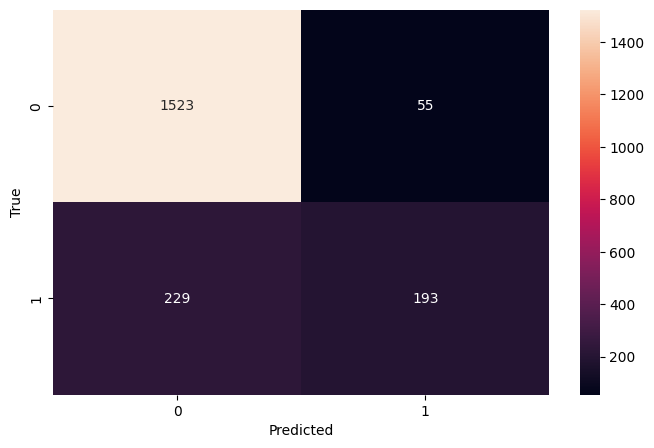

In [106]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [108]:
print(cm)

tf.Tensor(
[[1523   55]
 [ 229  193]], shape=(2, 2), dtype=int32)


## Let's analyze accuracy, precision, recall and f1_score
#### The confusion matrix is: (TP, TN, FP, FN according to class 0)
|True\Prediction|      0      |     1     |
|---------------|-------------|-----------|
|       0       |  1523 (TP)  |   55 (FN) |
|       1       |   229 (FP)  |  193 (TN) |

#### Here,
    TP = True Positive
    FP = False Positive
    TN = True Negetive
    FN = False Negetive
#### Equations:
    Accuracy = (TP + TN) / Total
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

## Accuracy

In [110]:
accuracy = round((1523+193)/(1523+55+229+193),2)
accuracy

0.86

### Precision, Recall, F1-Score for Class 0

In [118]:
precision0 = round(1523 / (1523 + 229),2)
precision0

0.87

In [119]:
recall0 = round(1523 / (1523 + 55),2)
recall0

0.97

In [120]:
f1_score0 = round(2 * (precision0 * recall0) / (precision0 + recall0),2)
f1_score0

0.92

### Precision, Recall, F1-Score for Class 1

In [121]:
precision1 = round(193 / (193 + 55),2)
precision1

0.78

In [122]:
recall1 = round(193 / (193 + 229),2)
recall1

0.46

In [123]:
f1_score1 = round(2 * (precision1 * recall1) / (precision1 + recall1),2)
f1_score1

0.58